In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Ex 4.1

In [2]:
def conf_bound_ratio(T, sigma_sqr, delta):
    t = np.arange(1, T + 1)
    conf_bound_1 = np.sqrt(1 + 1 / (t * sigma_sqr)) * np.sqrt((2 * np.log(1 / delta) + np.log(t * sigma_sqr + 1)) / t)
    conf_bound_2 = np.sqrt((2 * np.log(2 / delta)) / t)
    return conf_bound_1 / conf_bound_2

In [7]:
delta = 0.05
sigma_sqrs = 1 / (10 ** np.arange(7))
T = 1e8
ratios = np.zeros((len(sigma_sqrs), int(T)))

fig_1, ax_1 = plt.subplots()
fig_2, ax_2 = plt.subplots()
for i in range(len(sigma_sqrs)):
    result = conf_bound_ratio(T, sigma_sqrs[i], delta)
    ratios[i, :] = result
    ax_1.loglog(np.arange(1, T + 1), result, label = sigma_sqrs[i])
    ax_2.semilogx(np.arange(1, T + 1), result, label = sigma_sqrs[i])

ax_1.set_xlabel("t")
ax_1.set_ylabel("confidence bound ratio")
ax_1.legend(title = r"$\sigma^2$")
# ax.set_title(rf"$\sigma^2 =$ {sigma_sqrs[i]}")
fig_1.show()

ax_2.set_xlabel("t")
ax_2.set_ylim(0, 10)
ax_2.set_ylabel("confidence bound ratio")
ax_2.legend(title = r"$\sigma^2$")
fig_2.show()

C:\Users\Wenhao\AppData\Local\Temp\ipykernel_16356\3594133514.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_1.show()
C:\Users\Wenhao\AppData\Local\Temp\ipykernel_16356\3594133514.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_2.show()


Error in callback <function _draw_all_if_interactive at 0x00000185D3BB0AE0> (for post_execute), with arguments args (),kwargs {}:


MemoryError: Unable to allocate 1.49 GiB for an array with shape (100000000, 2) and data type float64

Error in callback <function flush_figures at 0x00000185D3BC2660> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

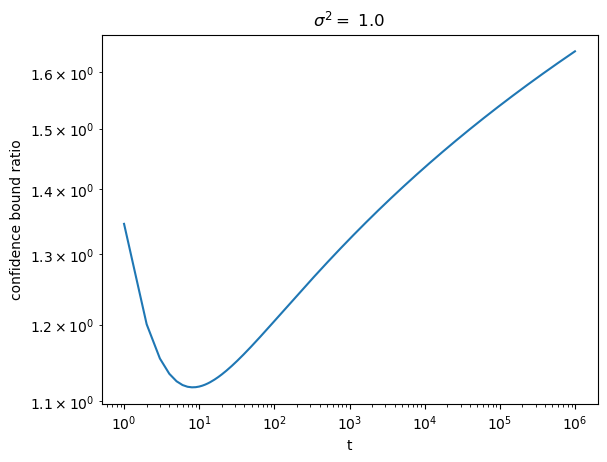

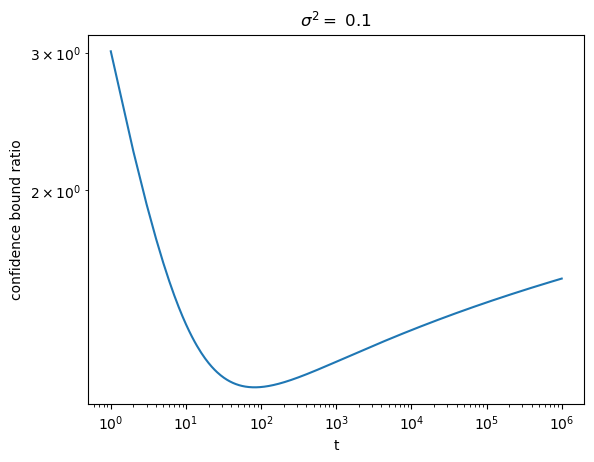

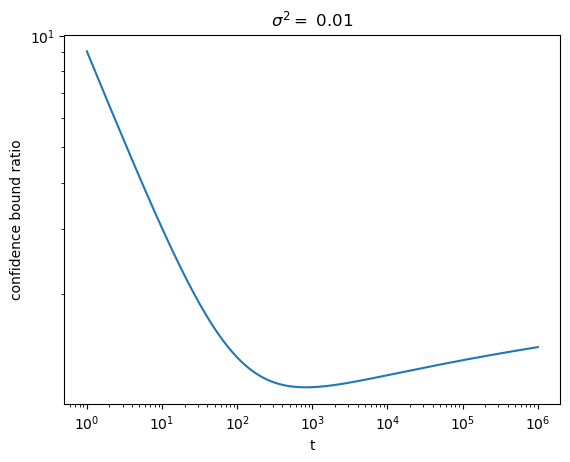

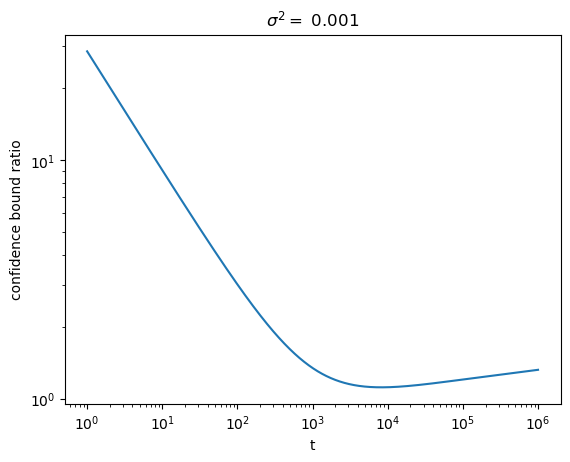

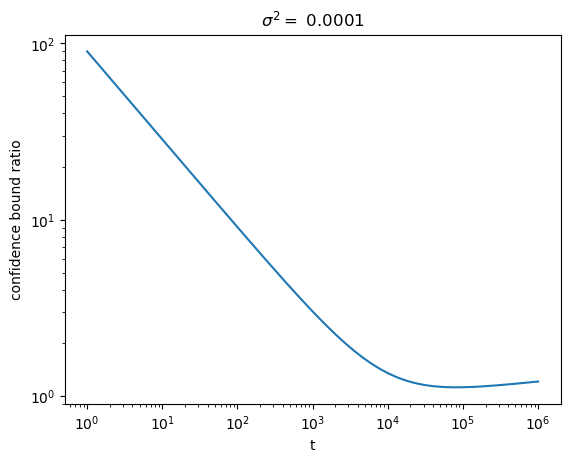

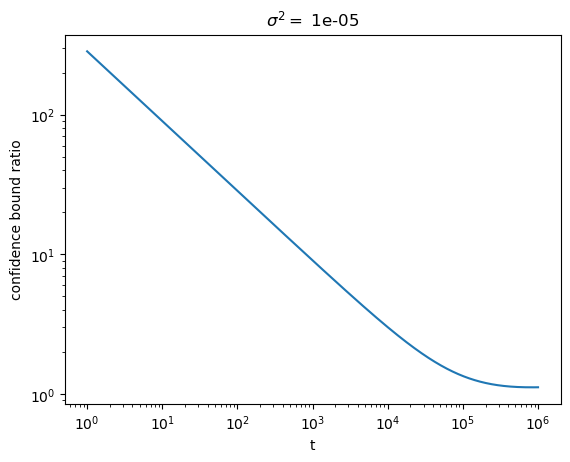

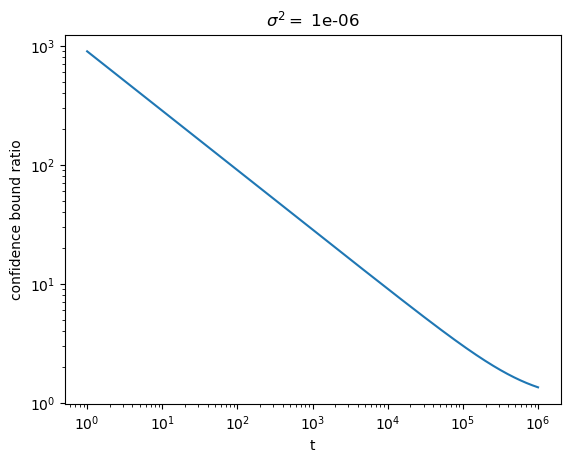

In [17]:
for i in range(len(sigma_sqrs)):
    fig, ax = plt.subplots()
    ax.loglog(np.arange(1, T), conf_bound_ratio(T, sigma_sqrs[i], delta))

    ax.set_xlabel("t")
    ax.set_ylabel("confidence bound ratio")
    ax.set_title(rf"$\sigma^2 =$ {sigma_sqrs[i]}")
    plt.show()

## 4.2

In [55]:
a = 0
d = 10
n = 10 + 2 ** 1
N = 1000
cov_mat = np.diag(np.arange(1, d + 1) ** (-a))

rng = np.random.default_rng(541)
X = rng.multivariate_normal(np.zeros(d), cov_mat, size=n)

In [6]:
def f_design_obj(A, X):
    A_inv = np.linalg.inv(A)
    return np.max(np.diag(X @ A_inv @ X.T))

def g_design_obj(A):
    return -np.log(np.linalg.det(A))

def greedy(N, n, d, X):
    I = np.zeros(N)
    I[:2 * d] = rng.integers(n, size = 2 * d)

    for t in np.arange(2 * d, N):
        design_objs = np.zeros(n)
        for k in np.arange(n):
            A = np.outer(X[k,:], X[k,:])
            X_I = X[I[:t].astype(int), :]
            A += X_I.T @ X_I
            # for j in np.arange(t):
            #     A += np.outer(X[int(I[j]),:], X[int(I[j]),:])
            # design_objs[k] = f_design_obj(A, X)
            design_objs[k] = g_design_obj(A)
        I[t] = np.argmin(design_objs)
    
    return I

C:\Users\Wenhao\AppData\Local\Temp\ipykernel_22308\4125542436.py:6: RuntimeWarning: invalid value encountered in log
  return -np.log(np.linalg.det(A))


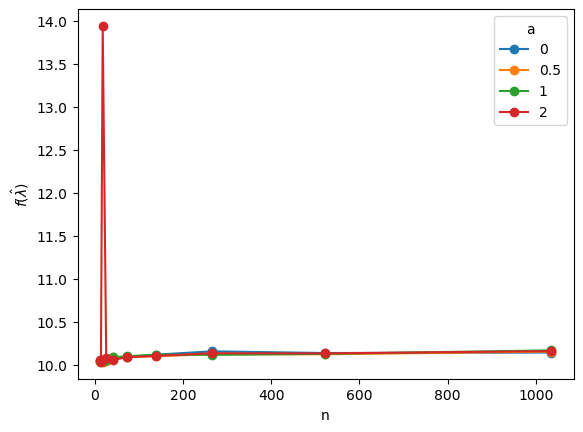

In [8]:
# a_range = [0, 0.5, 1, 2]
n_range = 10 + 2 ** np.arange(1, 11)
d = 10
N = 1000

rng = np.random.default_rng(541)

fig, ax = plt.subplots()

# a = 0
a = 0
cov_mat = np.diag(1 / (np.arange(1, d + 1) ** a))
final_objs_1 = np.zeros(len(n_range))
for i in range(len(n_range)):
    X = rng.multivariate_normal(np.zeros(d), cov_mat, size=n_range[i])
    I = greedy(N, n_range[i], d, X)
    final_objs_1[i] = f_design_obj(X[I.astype(int), :].T @ X[I.astype(int), :] / N, X)

ax.plot(n_range, final_objs_1, "o-", label=a)

# a = 0.5
a = 0.5
cov_mat = np.diag(1 / (np.arange(1, d + 1) ** a))
final_objs_2 = np.zeros(len(n_range))
for i in range(len(n_range)):
    X = rng.multivariate_normal(np.zeros(d), cov_mat, size=n_range[i])
    I = greedy(N, n_range[i], d, X)
    final_objs_2[i] = f_design_obj(X[I.astype(int), :].T @ X[I.astype(int), :] / N, X)

ax.plot(n_range, final_objs_2, "o-", label=a)

# a = 1
a = 1
cov_mat = np.diag(1 / (np.arange(1, d + 1) ** a))
final_objs_3 = np.zeros(len(n_range))
for i in range(len(n_range)):
    X = rng.multivariate_normal(np.zeros(d), cov_mat, size=n_range[i])
    I = greedy(N, n_range[i], d, X)
    final_objs_3[i] = f_design_obj(X[I.astype(int), :].T @ X[I.astype(int), :] / N, X)

ax.plot(n_range, final_objs_3, "o-", label=a)

# a = 2
a = 2
cov_mat = np.diag(1 / (np.arange(1, d + 1) ** a))
final_objs_4 = np.zeros(len(n_range))
for i in range(len(n_range)):
    X = rng.multivariate_normal(np.zeros(d), cov_mat, size=n_range[i])
    I = greedy(N, n_range[i], d, X)
    final_objs_4[i] = f_design_obj(X[I.astype(int), :].T @ X[I.astype(int), :] / N, X)

ax.plot(n_range, final_objs_4, "o-", label=a)


# for a in a_range:
#     cov_mat = np.diag(1 / (np.arange(1, d + 1) ** a))
#     final_objs = np.zeros(len(n_range))
#     for i in range(len(n_range)):
#         X = rng.multivariate_normal(np.zeros(d), cov_mat, size=n_range[i])
#         I = greedy(N, d, X)
#         final_objs[i] = f_design_obj(X[I.astype(int), :].T @ X[I.astype(int), :] / N, X)
    
#     ax.plot(n_range, final_objs, "o-", label=a)

ax.legend(title="a")
ax.set_xlabel("n")
ax.set_ylabel(r"$f(\hat{\lambda})$")
plt.show()

In [69]:
np.diag(np.arange(1, d + 1) ** (-a))

ValueError: Integers to negative integer powers are not allowed.

In [70]:
1 / (np.arange(1, d + 1) ** a)

array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
       0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ])

In [60]:
A_lam_hat = X[I.astype(int), :].T @ X[I.astype(int), :] / N
final_obj = f_design_obj(A_lam_hat, X)

In [61]:
final_obj

11.227117949290854